## Проектная работа по предобработке данных

## Исследование надежности заемщиков.
### Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Оглавление

1. [Обзор данных](#start)

2. [Предобработка данных](#prep)  
    2.1 [Заполнение пропусков](#fill)  
    2.2 [Проверка данных на аномалии и исправления.](#artifacts)  
    2.3 [Изменение типов данных.](#change_data_types)  
    2.4 [Удаление дубликатов.](#duplicates)  
    2.5 [Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.](#create_dicts)  
    2.6 [Категоризация дохода.](#category_income)  
    2.7 [Категоризация целей кредита.](#category_aim)  
3. [Ответы на вопросы.](#qustions)  
    3.1 [Есть ли зависимость между количеством детей и возвратом кредита в срок?](#answer_1)  
    3.2 [Есть ли зависимость между семейным положением и возвратом кредита в срок?:](#answer_2)  
    3.3 [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#answer_3)  
    3.4 [Как разные цели кредита влияют на его возврат в срок?](#answer_4)  
4. [Общий вывод](#conclusion)

В следующей ячейке будут храниться использыемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Обзор данных. <a id="start"></a>

Изучим данные, осмотрев первые 10 строк.

In [2]:
data = pd.read_csv('C:/Users/79153/Desktop/ya_projects/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Воспользуемся так же методом info() чтобы изучить данные

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Из выведенных данных можно сделать первые выводы: <a id='early_1'></a>
1. В столбце `days_employed` присутствует артефакт - отрицательные значения трудового стажа.
2. В столбце `education` присутствуют неявные дубликаты.
3. `total_income` и `days_employed` не соответсвует типу данных - для исчисления трудового стажа и месячного дохода больше подходит тип данных int, нежели float 
4. Заемщик из строки 4 имеет явно завышенный стаж, следует уточнить является ли это ошибкой или это пересчет досрочной пенсии. Данная строка может повредить исследованию.   
5. В данных присутствуют пропущенные значения в столбцах `total_income` и `days_employed`.

Проверим второй вывод:

In [5]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В дальнейшем необходимо привести к единому виду категории данного столбца.

Проверим вывод №4, предположив что выход на пенсию происходит в 65 лет, начало трудового стажа в 18 лет, а число рабочих дней в году равно 247 (например за 2021 год):

In [6]:
stakhanovci = data.loc[data['days_employed']>(65-18)*247].sort_values(by='days_employed', ascending=False)
print(len(stakhanovci))

3445


Стоит посчитать долю столь увлеченных работой заемщиков:

In [7]:
round(len(stakhanovci)/len(data), 4)

0.16

16,58% достаточная доля чтобы внести погрешность в исследование, не имея возможности уточнить причины столь высокой работоспособности выборки, учтем это при выборе метода заполнения пропусков в данном столбце.   

Проверим долю заемщиков младше 18 лет

In [8]:
data.loc[data['dob_years']<18]['purpose'].count() 

101

Стоит уточнить с какого возраста этот банк выдает займы, в данном исследовании не предполагается исследование влияния возрастного критерия на просрочки платежей, поэтому предположим что эти данные были записаны с ошибкой.

## Предобработка данных <a id='prep'></a>

### Заполнение пропусков. <a id='fill'></a>

Найдем пропущенные значения методом isna()

In [9]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Поиск методом isna() подтвердил выводы полученные при первичном исследовании методом info().
Изучим пропуски данных в датафрейме, так как предположим что соответсвие количества пропусков в графе  `total_income` с `days_employed` неслучайно. 

In [10]:
table = data.loc[data['days_employed'].isna()!=False]
display(table.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Судя по соответсвию трудового стажа эти заемщики намеренно не указали ежемесячный доход, данный пропуск является MNAR (не случайный пропуск). Чтобы избежать существенного искажения данных заполним пропуски медианным значением, так как ранее выявили существенное количество людей с крайне высоким стажем. 
Для трудового стажа так же [ранее](#early_1) была обнаружена аномалия - отрицательные значения. Для корректного подсчета медианного значания трудового стажа следует сначала избавиться от аномалии. <a id='artifacts'></a>

In [11]:
data['days_employed'] = abs(data['days_employed'])                                   # устранение отрицательных значений в столбце
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median()) # замена пропусков на медианное значение в 'days_employed'
data['total_income'] = data['total_income'].fillna(data['total_income'].median())    # замена пропусков на медианное значение в 'total_income'

Проверим наличие пропусков методом info():

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Изменение типов данных. <a id='change_data_types'></a>

Заменим вещественный тип данных на целочисленный в столбцах `total_income` и `days_employed` и проверим замену методом info()

In [13]:
data['days_employed'] = data['days_employed'].astype('int') 
data['total_income'] = data['total_income'].astype('int')
data['children'] = data['children'].astype('int32') 
data['dob_years'] = data['dob_years'].astype('int32')
data['education_id'] = data['education_id'].astype('int32') 
data['debt'] = data['debt'].astype('int32')
data['family_status_id'] = data['family_status_id'].astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int32 
 1   days_employed     21525 non-null  int32 
 2   dob_years         21525 non-null  int32 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int32 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int32 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int32 
 10  total_income      21525 non-null  int32 
 11  purpose           21525 non-null  object
dtypes: int32(7), object(5)
memory usage: 1.4+ MB


### Удаление дубликатов. <a id="duplicates"></a>

Проверим дата фрейм на наличие явных дубликатов. Число дубликатов сохраним, чтобы потом сравнить с обработанными данными:

In [14]:
start_duplicate = data.duplicated().sum()
print(start_duplicate)

54


Устраним неявные дубликаты в колонке `education`:

In [15]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Проверим остальные категориальные переменные на неявные дубликаты:

In [16]:
cat_features = ['family_status', 'gender', 'purpose', 'income_type', 'children'] # категориальные колонки

for col in cat_features:
    print(col)
    print(" ")
    print(data[col].value_counts())
    print("---"*15)

family_status
 
женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64
---------------------------------------------
gender
 
F      14236
M       7288
XNA        1
Name: gender, dtype: int64
---------------------------------------------
purpose
 
свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей не

Как видно из данных в столбцах `gender` и `income_type` неявные дубликаты отсутствуют, а в колонке `purpose` много целей не слишком отличающихся друг от друга, для анализа данных удобнее пользоваться более широкими категориями. Так же заметен артефакт - отрицательное колличество детей у 47 заемщиков и 20 детей у 76ти заемщиков. Скорее всего подразумевается 1 ребенок в первом случае, во втором 2 ребенка, следует уточнить у разработчика каким образом получилось 20 детей, но ввиду невозможности этого и разрыва в количестве детей, будем считать что это артефакт и подразумевалось 2 ребенка.   
Рассчитаем долю данных артефактов, если она менее 5% то заменим их на предполагаемые значения:

In [17]:
print('Доля заемщиков с -1 ребенком: '+str(round(data['children'].loc[data['children']==-1].count()/len(data),4)))
print('Доля заемщиков с 20 детьми: '+str(round(data['children'].loc[data['children']==20].count()/len(data),4)))

Доля заемщиков с -1 ребенком: 0.0022
Доля заемщиков с 20 детьми: 0.0035


In [18]:
data['children'] = abs(data['children'])           # устранение отрицательных значений в столбце 'children'
data['children'] = data['children'].replace(20,2)  # замена 20 детей на 2 в столбце 'children'
data['children'].value_counts()                    # проверка 

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Попробуем посмотреть что за заемщик с гендером `XNA`

In [19]:
data.loc[data['gender']=='XNA' ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


В данном исследовании не предполагается ислледования заемщиков по гендеру, установить корректно гендер данного заемщика невозможно, но ввиду того что такой заемщик  один на весь датасет предположим что он все же относится к наиболее многочисленной группе заемщиков с гендером `F`

In [20]:
data['gender'] = data['gender'].replace('XNA','F')    # замена
data['gender'].unique()                               # проверка

array(['F', 'M'], dtype=object)

Проверим разницу явных дубликатов до и после обработки данных.

In [21]:
print(f'Число явных дубликатов до предобработки данныйх: {start_duplicate}')
print(f'Число явных дубликатов после предобработки данных: {data.duplicated().sum()}')

Число явных дубликатов до предобработки данныйх: 54
Число явных дубликатов после предобработки данных: 71


Удалим явные дубликаты

In [22]:
data = data.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов
data.duplicated().sum() # проверка 

0

## Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма. <a id="create_dicts"></a>

Создадим новые датафреймы `education_dict` и `family_status_dict`, которые по сути являются словарями:

In [23]:
education_dict = pd.DataFrame(data=data, columns=['education_id', 'education']).drop_duplicates().reset_index(drop=True)
family_status_dict = pd.DataFrame(data=data, columns=['family_status_id', 'family_status']).drop_duplicates().reset_index(drop=True)
education_dict.head(10)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Удалим из исходного датафрейма столбцы `education` и `family_status`:

In [24]:
data = data.drop(labels=['education','family_status'], axis = 1)
data.head(10) # проверка

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,1,0,M,сотрудник,0,135823,образование
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи


## Категоризация дохода. <a id="category_income"></a>

Создадим новый столбец `total_income_category` характеризующий заемщиков по месячному доходу с категориями:

0–30000 — 'E';

30001–50000 — 'D';

50001–200000 — 'C';

200001–1000000 — 'B';

1000001 и выше — 'A'.
Для этого напишем функцию и создадим дополнительный столбец в датафрейме:

In [25]:
def income_category(row):
    if 0<=row<=30000:
        return 'E'
    elif 30001<=row<=50000:
        return 'D'
    elif 50001<=row<=200000:
        return 'C'
    elif 200001<=row<=1000000:
        return 'B'
    elif 1000001<=row:
        return 'A'
    else: 
        return 'ошибка кода!'
data['total_income_category']= data['total_income'].apply(income_category)
data['total_income_category'].unique() # проверка на наличие ошибок кода

array(['B', 'C', 'D', 'E', 'A'], dtype=object)

In [26]:
data.head(5) # просмотрим обновленный датафрейм 

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


## Категоризация целей кредита. <a id='category_aim'></a>

Создадим дополнительный столбец `purpose_category` с категориями целей кредитования, для этого изучим уникальные значения с целями кредитования `purpose`:

In [27]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [28]:
def purpose_category_f(row):
    if 'авто' in row.strip().lower():
        return 'операции с автомобилем'
    elif 'недв' in row.strip().lower():
        return 'операции с недвижимостью'
    elif 'жиль' in row.strip().lower():
        return 'операции с недвижимостью'
    elif 'свад' in row.strip().lower():
        return 'проведение свадьбы'
    elif 'обр' in row.strip().lower():
        return 'получение образования'
    else: 
        return 'ошибка кода!'

data['purpose_category']= data['purpose'].apply(purpose_category_f)
data['purpose_category'].unique()            # проверка на наличие ошибок кода

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

## Ответы на вопросы. <a id='qustions'></a>

### Есть ли зависимость между количеством детей и возвратом кредита в срок? <a id='answer_1'></a>

,sum,count,mean
,debt,debt,debt
children,,,
0,1063,14091,0.075438
1,445,4855,0.091658
2,202,2128,0.094925
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


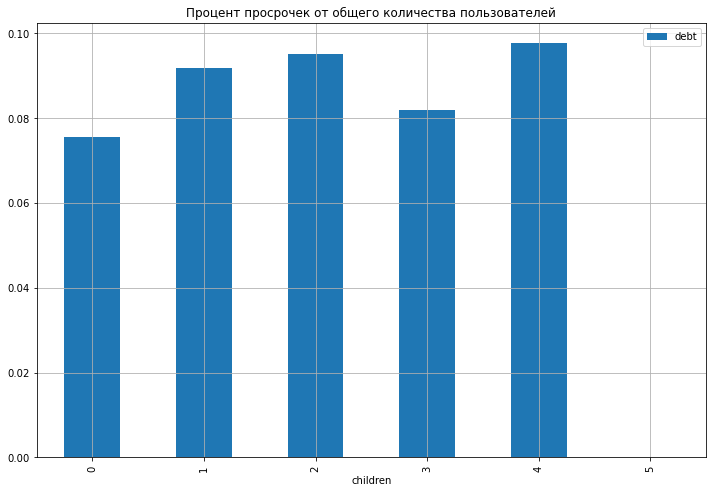

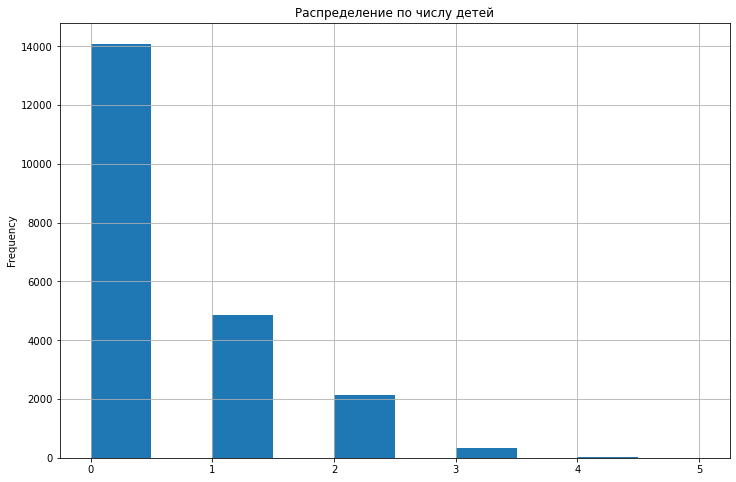

In [29]:
table_1 = data.pivot_table(index=['children'], values='debt', aggfunc=['sum','count','mean'])
display(table_1)
table_1['mean'].plot(kind='bar', figsize=(12,8), grid=True, title='Процент просрочек от общего количества пользователей')
plt.show()
data['children'].plot(kind='hist',figsize=(12,8), grid=True, title='Распределение по числу детей')
plt.show()

В данном случае можно сделать вывод, что бездетные заемщики менее склонны к просрочкам платежей, в то время как среди заемщиков с детьми: заемщики с 5 детьми наиболее ответственно подходят к погашению кредита, но в то же время можно предположить что само число таких заемщиков в выборке не репрезентативно в ввиду их малого количества, заемщики с 4 детьми наименее надежные клиенты. 


### Есть ли зависимость между семейным положением и возвратом кредита в срок? <a id='answer_2'></a>

,sum,count,mean
,debt,debt,debt
family_status_id,,,
0,931,12339,0.075452
1,388,4151,0.093471
2,63,959,0.065693
3,85,1195,0.071130
4,274,2810,0.097509


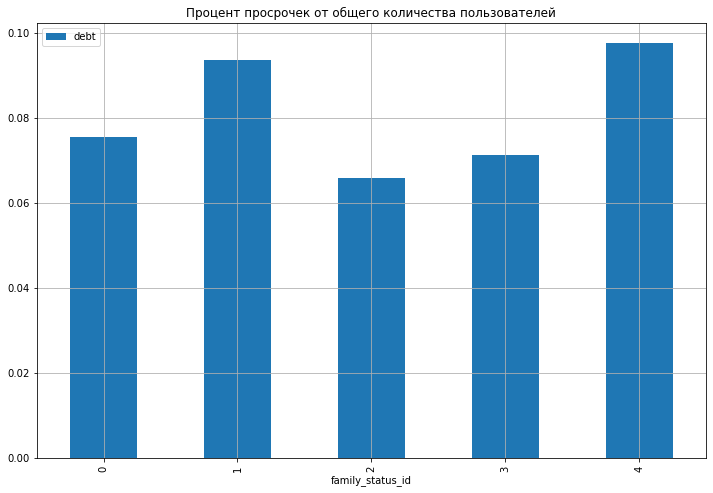

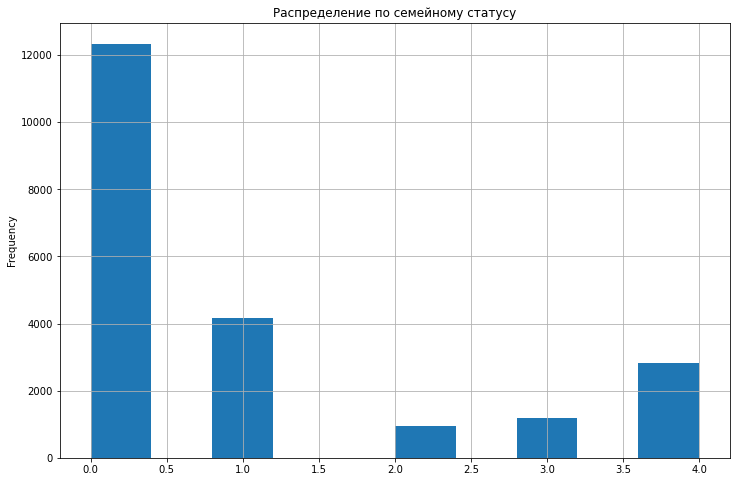

In [30]:
table_2 = data.pivot_table(index=['family_status_id'], values='debt', aggfunc=['sum','count','mean'])
display(table_2)
table_2['mean'].plot(kind='bar', figsize=(12,8), grid=True, title='Процент просрочек от общего количества пользователей')
plt.show()
data['family_status_id'].plot(kind='hist',figsize=(12,8), grid=True, title='Распределение по семейному статусу')
plt.show()

In [31]:
data_subcategory = table_2.merge(family_status_dict, on='family_status_id', how='left') # расшифруем категории с помощью ранее созданного словаря
display(data_subcategory)                                                      

C:\Users\79153\AppData\Local\Temp\ipykernel_3004\2625883571.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data_subcategory = table_2.merge(family_status_dict, on='family_status_id', how='left') # расшифруем категории с помощью ранее созданного словаря


,family_status_id,"(sum, debt)","(count, debt)","(mean, debt)",family_status
0,0,931,12339,0.075452,женат / замужем
1,1,388,4151,0.093471,гражданский брак
2,2,63,959,0.065693,вдовец / вдова
3,3,85,1195,0.071130,в разводе
4,4,274,2810,0.097509,Не женат / не замужем


Таким образом можно увидеть что наибольший процент просрочки выплат у не женатых/не замужних, люди же потерявшие супруга напротив относятся к выплатам ответственно. Но при этом вторая категория самая малочисленная.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок? <a id='answer_3'></a>

,sum,count,mean
,debt,debt,debt
total_income_category,,,
A,2,25,0.080000
B,356,5041,0.070621
C,1360,16016,0.084915
D,21,350,0.060000
E,2,22,0.090909


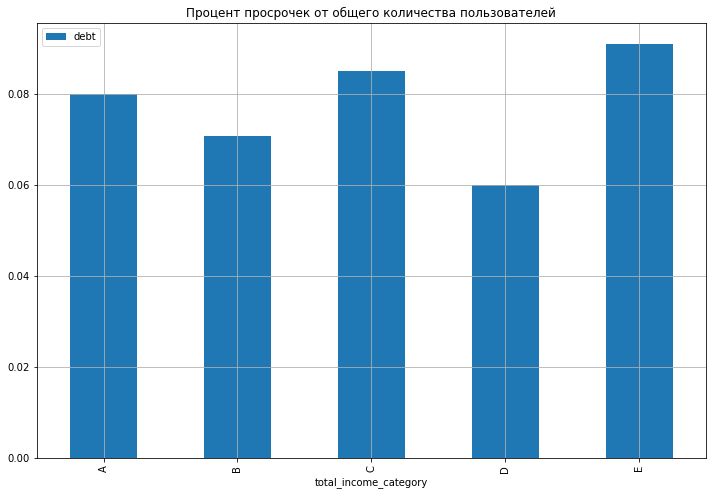

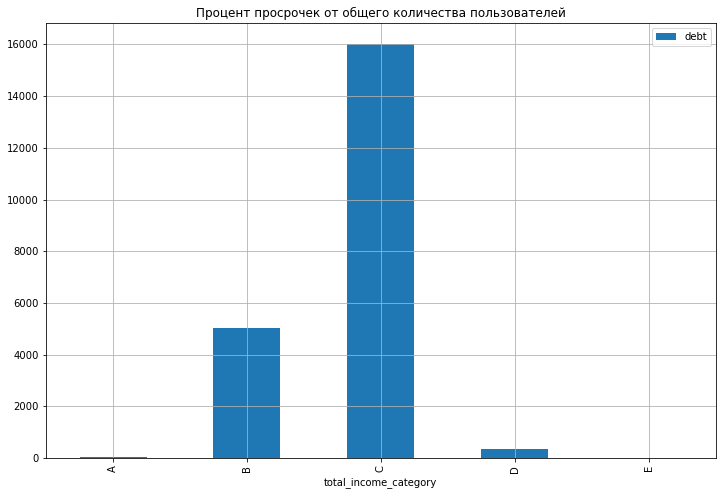

In [32]:
table_3 = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=['sum','count','mean'])
display(table_3)
table_3['mean'].plot(kind='bar', figsize=(12,8), grid=True, title='Процент просрочек от общего количества пользователей')
plt.show()
table_3['count'].plot(kind='bar', figsize=(12,8), grid=True, title='Процент просрочек от общего количества пользователей')
plt.show()

Из данных можно сделать вывод что категория Е (доход до 30000 руб/мес.) наименее надежные заемщики, а наиболее надежные заемщики - категория D (доход 30000-50000 руб/мес.). Зависимость просрочки платежей от дохода не линейная, но можно понять что наиболее выгодно сотрудничать с заемщиками группы B и D. При этом категория В вторая по числу клиентов, категория С наиболее многочисленная, но и по задержкам оплаты она занимает второе место.

### Как разные цели кредита влияют на его возврат в срок? <a id='answer_4'></a>

,sum,count,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,403,4306,0.093590
операции с недвижимостью,782,10811,0.072334
получение образования,370,4013,0.092200
проведение свадьбы,186,2324,0.080034


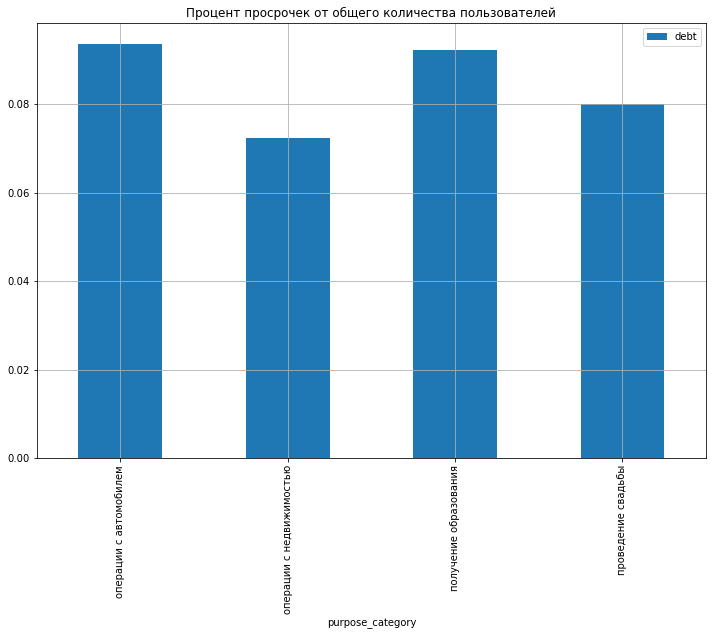

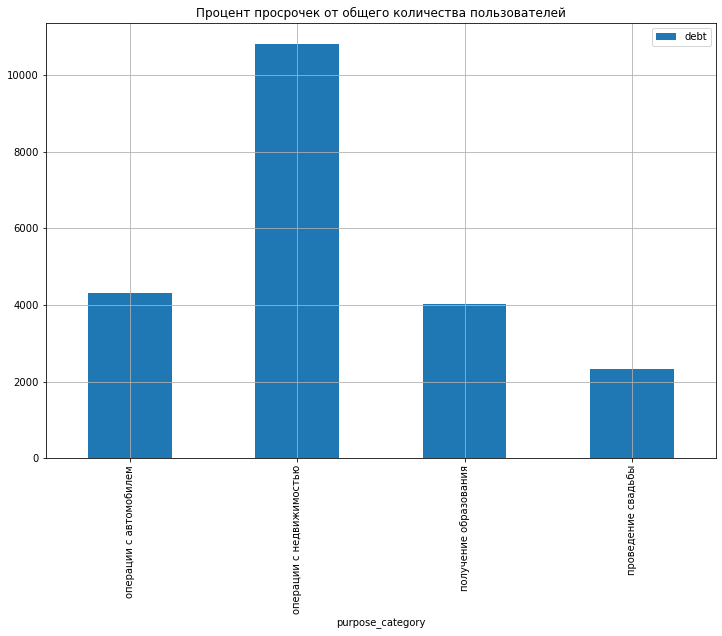

In [33]:
table_4 = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=['sum','count','mean'])

display(table_4)
table_4['mean'].plot(kind='bar', figsize=(12,8), grid=True, title='Процент просрочек от общего количества пользователей')
plt.show()
table_4['count'].plot(kind='bar', figsize=(12,8), grid=True, title='Процент просрочек от общего количества пользователей')
plt.show()

В срок чаще всего возвращают кредиты вовремя на операции с недвижимостью, наименее надежны заемщики пороводящие операции с автомобилем. Это говорит о том что приобретение недвижимости считается более ответственным шагом в жизни и подвергается более тщательному планированию. 

## Выводы <a id='conclusion'></a>

В ходе обработки данных были выявлены пропуски и неявные дубликаты. Очень высокая доля заемщиков с завышенным стажем, поскольку исследования по стажу не предполагались это не сказалось на результатах, но говорит об ошибках извлечения данных или неверном заполнении анкет. Так же в данных были обнаружены заемщики с `-1` и `20` числом детей, данные строки были обработаны как `1` и `2` ввиду малого количества таких строк. Так же в данных присутствовали заемщики младше 18 лет, ввиду отсутствия необходимости анализа по возрастному критерию и малой доли этих данных мы сочли это за ошибку записи данного параметра. 

В исходных данных много недочетов, необходима работа с записью и извлечением данных.

В ходе исследования мы выяснили ряд зависимостей по просрочкам по кредиту: 
- 1. Бездетные наиболее надежные заемщики
- 2. Вдовцы и разведенные делают взносы вовремя, чаще чем холостые и семейные люди
- 3. Зароботок идеального заемщика должен находиться в интервале 30-50 тысяч рублей
- 4. Операции с недвижимостью планируются наиболее тщательно, поэтому просрочки платежей в них меньше.

Таким образом можно представить себе портрет идеального заемщика.

При разработке системы скорринга следует уделять внимание таким категориальным параметрам как семейный статус и цель займа. Я бы предложил использовать коэффициэнты для пени при просрочке платежей по кредиту - большие штрафы для более рискованных категорий могли бы простимулировать заемщиков делать выплаты вовремя.  Колличественные параметры такие как число детей и среднемесячный доход не имеют линейной зависимости, что так же необходимо учитывать при разработке системы скорринга. Возможно следовало бы разбить среднемесячный доход на большее колличество категорий, что дало бы более качественную зависимость. При анализе колличества детей следует учитывать число людей с соответствующим колличеством детей. 

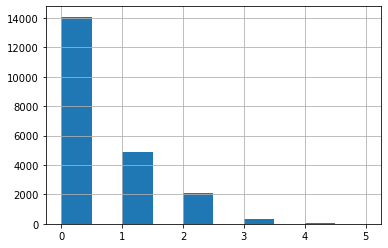

In [34]:
data['children'].hist()
plt.show()

Взглянем на гистограмму по сути в данном датасете заёмщики с числом детей более 2 - выбросы данных, использование которых в скорринге было бы некорректным. Если брать это во внимание то зависимость обратная - чем больше детей, тем больше риск просрочки платежа.